<a href="https://colab.research.google.com/github/yeijSong/HandsOnDataAnalysis/blob/main/03_COVID_19_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 준비하기

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [65]:
df_patient = pd.read_csv('PatientInfo.csv')

### 1. COVID-19 환자 데이터 전처리

In [66]:
df_patient.head(3)
# NaN값이 있음을 확인할 수 있음

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released


In [67]:
df_patient.tail(3)
# 3388개의 데이터가 있음을 확인

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3385,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated
3387,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6.0,NaN,2020-04-14,NaN,NaN,isolated


In [68]:
df_patient.info()
# 결측치가 꽤 있음, 데이터타입 대부분 문자열임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3388 non-null   int64  
 1   global_num          2276 non-null   float64
 2   gender              3311 non-null   object 
 3   birth_year          2927 non-null   float64
 4   age                 3304 non-null   object 
 5   country             3388 non-null   object 
 6   province            3388 non-null   object 
 7   city                3309 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2620 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         822 non-null    float64
 12  contact_number      643 non-null    float64
 13  symptom_onset_date  481 non-null    object 
 14  confirmed_date      3385 non-null   object 
 15  released_date       1327 non-null   object 
 16  deceas

데이터 결측치 확인

In [69]:
df_patient.isna() # null값인지 물어보는 명령어

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
3,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,False,False,False,True,False,False,False,False,True,False,True,True,False,True,False,True,True,False
3384,False,True,False,True,False,False,False,False,True,False,True,True,False,True,False,True,True,False
3385,False,True,False,True,False,False,False,False,True,False,True,False,False,True,False,True,True,False
3386,False,True,False,True,False,False,False,False,True,False,True,True,False,True,False,True,True,False


In [70]:
df_patient.isna().sum() # null값인경우(True)인 값 개수의 합

patient_id               0
global_num            1112
gender                  77
birth_year             461
age                     84
country                  0
province                 0
city                    79
disease               3370
infection_case         768
infection_order       3357
infected_by           2566
contact_number        2745
symptom_onset_date    2907
confirmed_date           3
released_date         2061
deceased_date         3326
state                    0
dtype: int64

나이(age)데이터를 정확하게 숫자로 변경 ex) 20s -> 23<br>
  how? (현재 년도) - (태어난 연도)<br>
1. NaN 데이터는 계산이 불가 -> NaN데이터를 0으로 채워 처리<br>
2. 나이 계산 시(현재 년도 - 태어난 연도), 0이면 다시 NaN으로 채우기

In [71]:
df_patient['birth_year'] = df_patient.birth_year.fillna(0.0).astype(int)
# 뒤에서 NaN값으로 다시 바꿔주게 되더라도
# 비교연산자를 통해 데이터처리를 하려면
# 우선 NaN을 숫자의 형태로 바꿔줄 필요가 있다

In [72]:
df_patient

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,7000000009,9651.0,female,0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,0,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


In [73]:
df_patient.isna().sum()

patient_id               0
global_num            1112
gender                  77
birth_year               0
age                     84
country                  0
province                 0
city                    79
disease               3370
infection_case         768
infection_order       3357
infected_by           2566
contact_number        2745
symptom_onset_date    2907
confirmed_date           3
released_date         2061
deceased_date         3326
state                    0
dtype: int64

In [74]:
# 0보다 큰 값은 그대로 사용하고 0인 값은 NaN으로 변환 - > 나이 계산시 2021살 방지
df_patient['birth_year'] = df_patient['birth_year'].map(lambda val : val if val > 0 else np.nan)
# map이 데이터를 하나씩 뽑아주면 lambda가 계산한 결과를 리스트로 반환하여 map이 다시 데이터셋에 넣어줌
# np.nan으로 하면 계산시 nan값은 제외하고 계산하게된다

In [75]:
df_patient['age'] = 2021 - df_patient['birth_year']
df_patient.tail()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3383,7000000009,9651.0,female,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated
3387,7000000013,NaN,female,NaN,NaN,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6.0,NaN,2020-04-14,NaN,NaN,isolated


In [76]:
patient = df_patient
# 전처리한 데이터를 다른 변수에 저장하여 전처리 데이터 원본 저장

### 2. 격리해제자(released) 데이터

In [77]:
# 격리해제자 정보 담기
released = patient[patient.state == 'released']
released.head(3)

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,57.0,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,34.0,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,57.0,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released


In [78]:
released.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 3382
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          1886 non-null   int64  
 1   global_num          1220 non-null   float64
 2   gender              1867 non-null   object 
 3   birth_year          1606 non-null   float64
 4   age                 1606 non-null   float64
 5   country             1886 non-null   object 
 6   province            1886 non-null   object 
 7   city                1859 non-null   object 
 8   disease             0 non-null      object 
 9   infection_case      1328 non-null   object 
 10  infection_order     29 non-null     float64
 11  infected_by         361 non-null    float64
 12  contact_number      455 non-null    float64
 13  symptom_onset_date  284 non-null    object 
 14  confirmed_date      1886 non-null   object 
 15  released_date       1314 non-null   object 
 16  deceas

격리해제자들의 연령대 분석

In [ ]:
# 격리해제자들의 연령대 분포 확인
plt.figure(figsize=(10,6), dpi=200)
sns.set_style('darkgrid')
plt.title('Age distribution of the released')
sns.kdeplot(data=released['age'],shade=True)
#kdeplot은 분포도, shade가 true이면 그래프 내부 색이 채워진다

### 3. 격리된 환자(isoloated) 데이터

In [80]:
# 격리된 환자의 정보 담기
isolated = patient[patient.state == 'isolated']
isolated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433 entries, 14 to 3387
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          1433 non-null   int64  
 1   global_num          997 non-null    float64
 2   gender              1375 non-null   object 
 3   birth_year          1257 non-null   float64
 4   age                 1257 non-null   float64
 5   country             1433 non-null   object 
 6   province            1433 non-null   object 
 7   city                1400 non-null   object 
 8   disease             0 non-null      object 
 9   infection_case      1263 non-null   object 
 10  infection_order     2 non-null      float64
 11  infected_by         461 non-null    float64
 12  contact_number      184 non-null    float64
 13  symptom_onset_date  191 non-null    object 
 14  confirmed_date      1430 non-null   object 
 15  released_date       11 non-null     object 
 16  decea

In [ ]:
# 격리자들의 연령대 분포 확인
plt.figure(figsize=(10,6), dpi=200)
sns.set_style('darkgrid')
plt.title('Age distribution of the isolated')
sns.kdeplot(data=isolated['age'],shade=True)

### 4. 사망자(deceased) 데이터

In [82]:
# 사망한 환자의 정보 담기
deceased = patient[patient.state == 'deceased']
deceased.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 108 to 3205
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          69 non-null     int64  
 1   global_num          59 non-null     float64
 2   gender              69 non-null     object 
 3   birth_year          64 non-null     float64
 4   age                 64 non-null     float64
 5   country             69 non-null     object 
 6   province            69 non-null     object 
 7   city                50 non-null     object 
 8   disease             18 non-null     object 
 9   infection_case      29 non-null     object 
 10  infection_order     0 non-null      float64
 11  infected_by         0 non-null      float64
 12  contact_number      4 non-null      float64
 13  symptom_onset_date  6 non-null      object 
 14  confirmed_date      69 non-null     object 
 15  released_date       2 non-null      object 
 16  deceas

In [ ]:
# 사망자들의 연령대 분포 확인
plt.figure(figsize=(10,6), dpi=200)
sns.set_style('darkgrid')
plt.title('Age distribution of the deceased')
sns.kdeplot(data=deceased['age'],shade=True)

### 5. 사망자에 따른 성별(gender) 데이터

In [84]:
male_dead = deceased[deceased.gender == 'male']
female_dead = deceased[deceased.gender == 'female']

In [85]:
male_dead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 108 to 3154
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          44 non-null     int64  
 1   global_num          39 non-null     float64
 2   gender              44 non-null     object 
 3   birth_year          42 non-null     float64
 4   age                 42 non-null     float64
 5   country             44 non-null     object 
 6   province            44 non-null     object 
 7   city                31 non-null     object 
 8   disease             13 non-null     object 
 9   infection_case      20 non-null     object 
 10  infection_order     0 non-null      float64
 11  infected_by         0 non-null      float64
 12  contact_number      2 non-null      float64
 13  symptom_onset_date  5 non-null      object 
 14  confirmed_date      44 non-null     object 
 15  released_date       0 non-null      object 
 16  deceas

In [86]:
female_dead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 727 to 3205
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          25 non-null     int64  
 1   global_num          20 non-null     float64
 2   gender              25 non-null     object 
 3   birth_year          22 non-null     float64
 4   age                 22 non-null     float64
 5   country             25 non-null     object 
 6   province            25 non-null     object 
 7   city                19 non-null     object 
 8   disease             5 non-null      object 
 9   infection_case      9 non-null      object 
 10  infection_order     0 non-null      float64
 11  infected_by         0 non-null      float64
 12  contact_number      2 non-null      float64
 13  symptom_onset_date  1 non-null      object 
 14  confirmed_date      25 non-null     object 
 15  released_date       2 non-null      object 
 16  deceas

성별에 따른 사망자의 연령분포

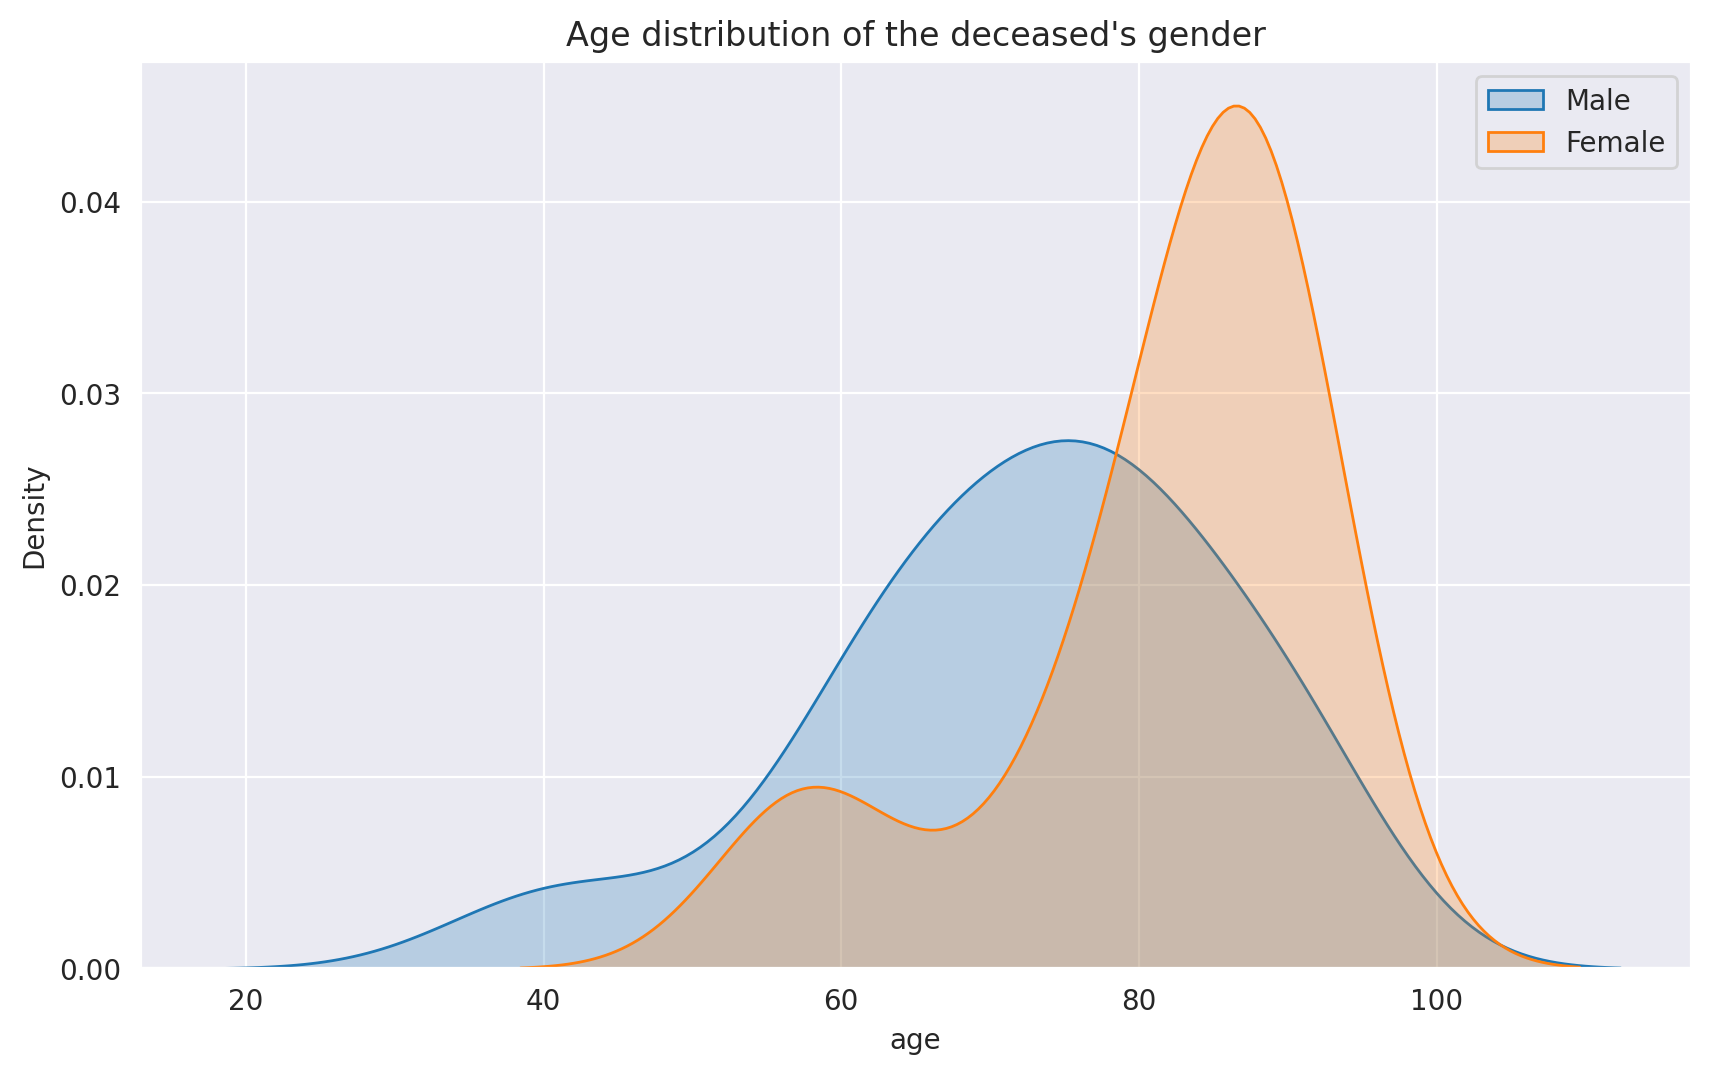

In [87]:
# 성별에 따른 사망자들의 연령대 분포 확인
plt.figure(figsize=(10,6), dpi=200)
sns.set_style('darkgrid')
plt.title("Age distribution of the deceased's gender")
sns.kdeplot(data=male_dead['age'],label='Male',shade=True)
sns.kdeplot(data=female_dead['age'],label='Female',shade=True)
plt.legend()

KDE : Kernel Density Estimator 추가한 distplot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


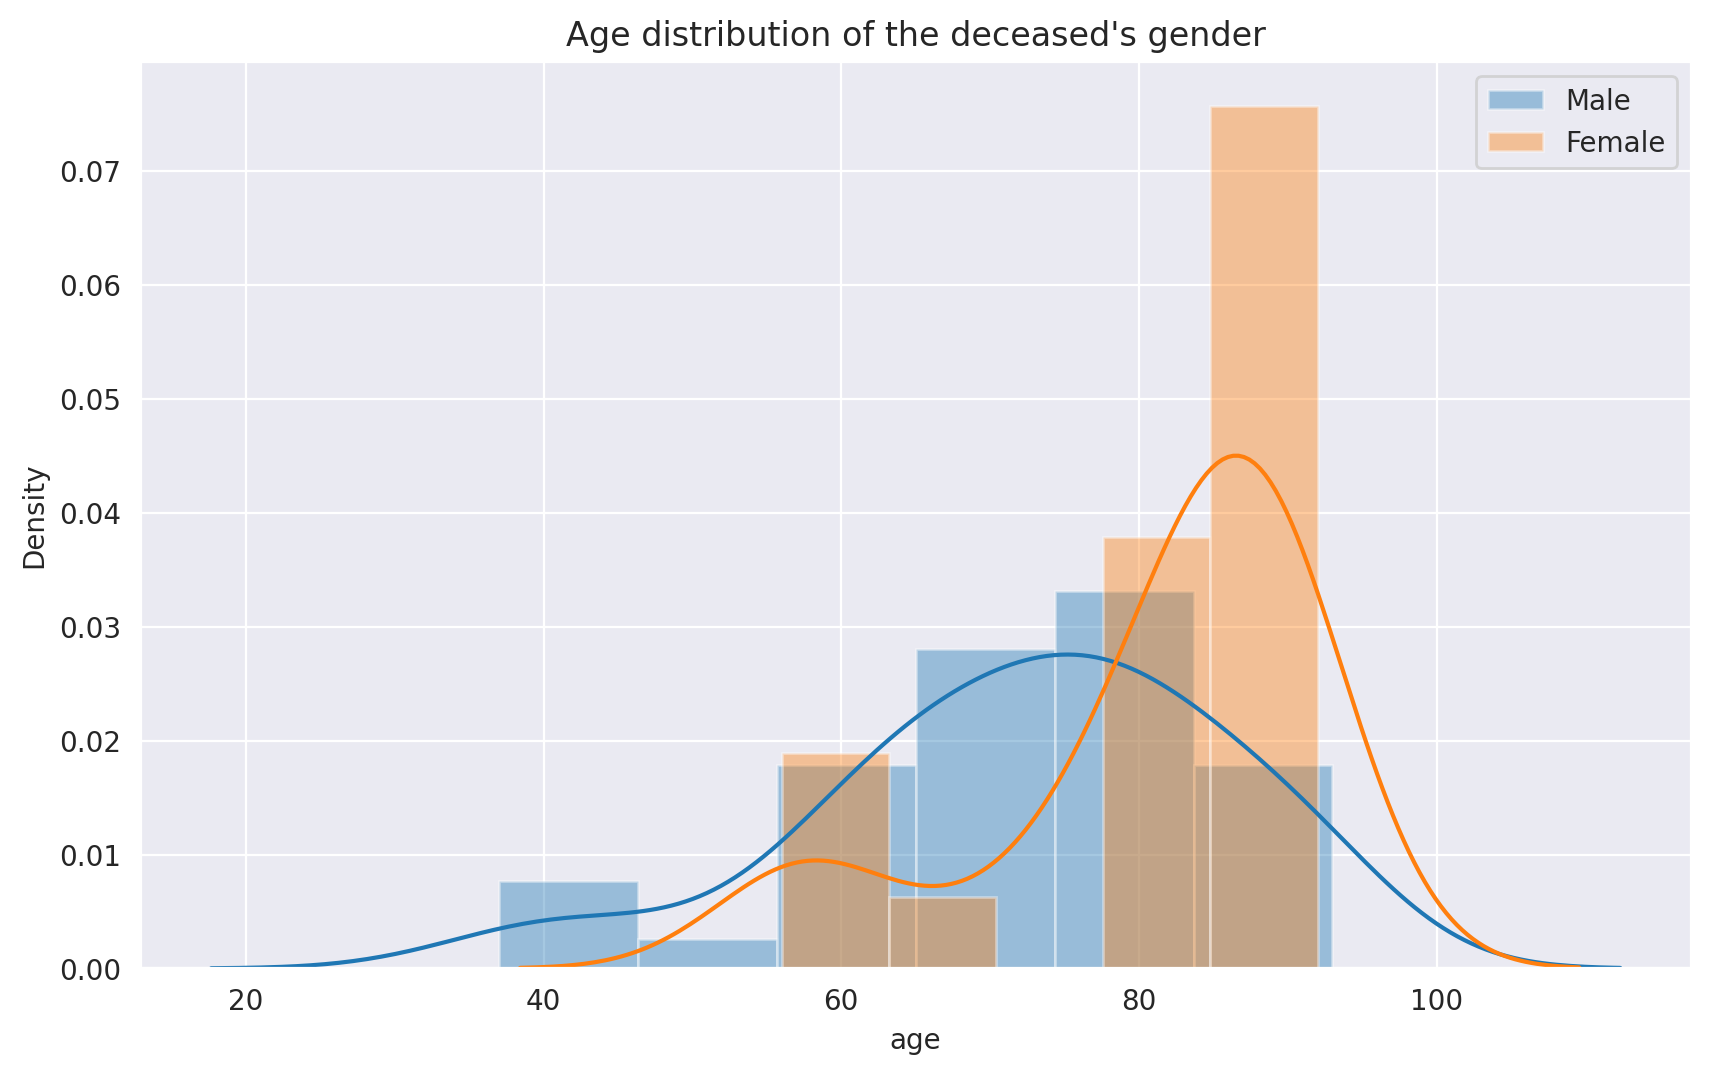

In [88]:
# 성별에 따른 사망자들의 연령대 분포 확인
plt.figure(figsize=(10,6), dpi=200)
sns.set_style('darkgrid')
plt.title("Age distribution of the deceased's gender")
sns.distplot(a=male_dead['age'],label='Male', kde=True)
sns.distplot(a=female_dead['age'],label='Female', kde=True)
# displot은 히스토그램을 그려준다
# 여성데이터의 결측치들을 포함하여 kde로 분포를 그렸기 때문에 자료가 명확하지 않을 수 있으므로
# 히스토그램을 추가하여 정확하게 데이터를 보여줄 수 있다.
plt.legend()

사망자의 성별 비교<br>
바차트->파이차트->분포

In [ ]:
plt.figure(figsize=(10,6), dpi=200)
plt.title('Gender of the deceased')
deceased.gender.value_counts().plot.bar()

In [ ]:
plt.figure(figsize=(10,6), dpi=200)
plt.title('Gender of the deceased')
deceased.gender.value_counts().plot.pie(autopct='%1.f%%')

### 6. 환자 유형별(격리해제자, 격리자, 사망자) 연령 분포

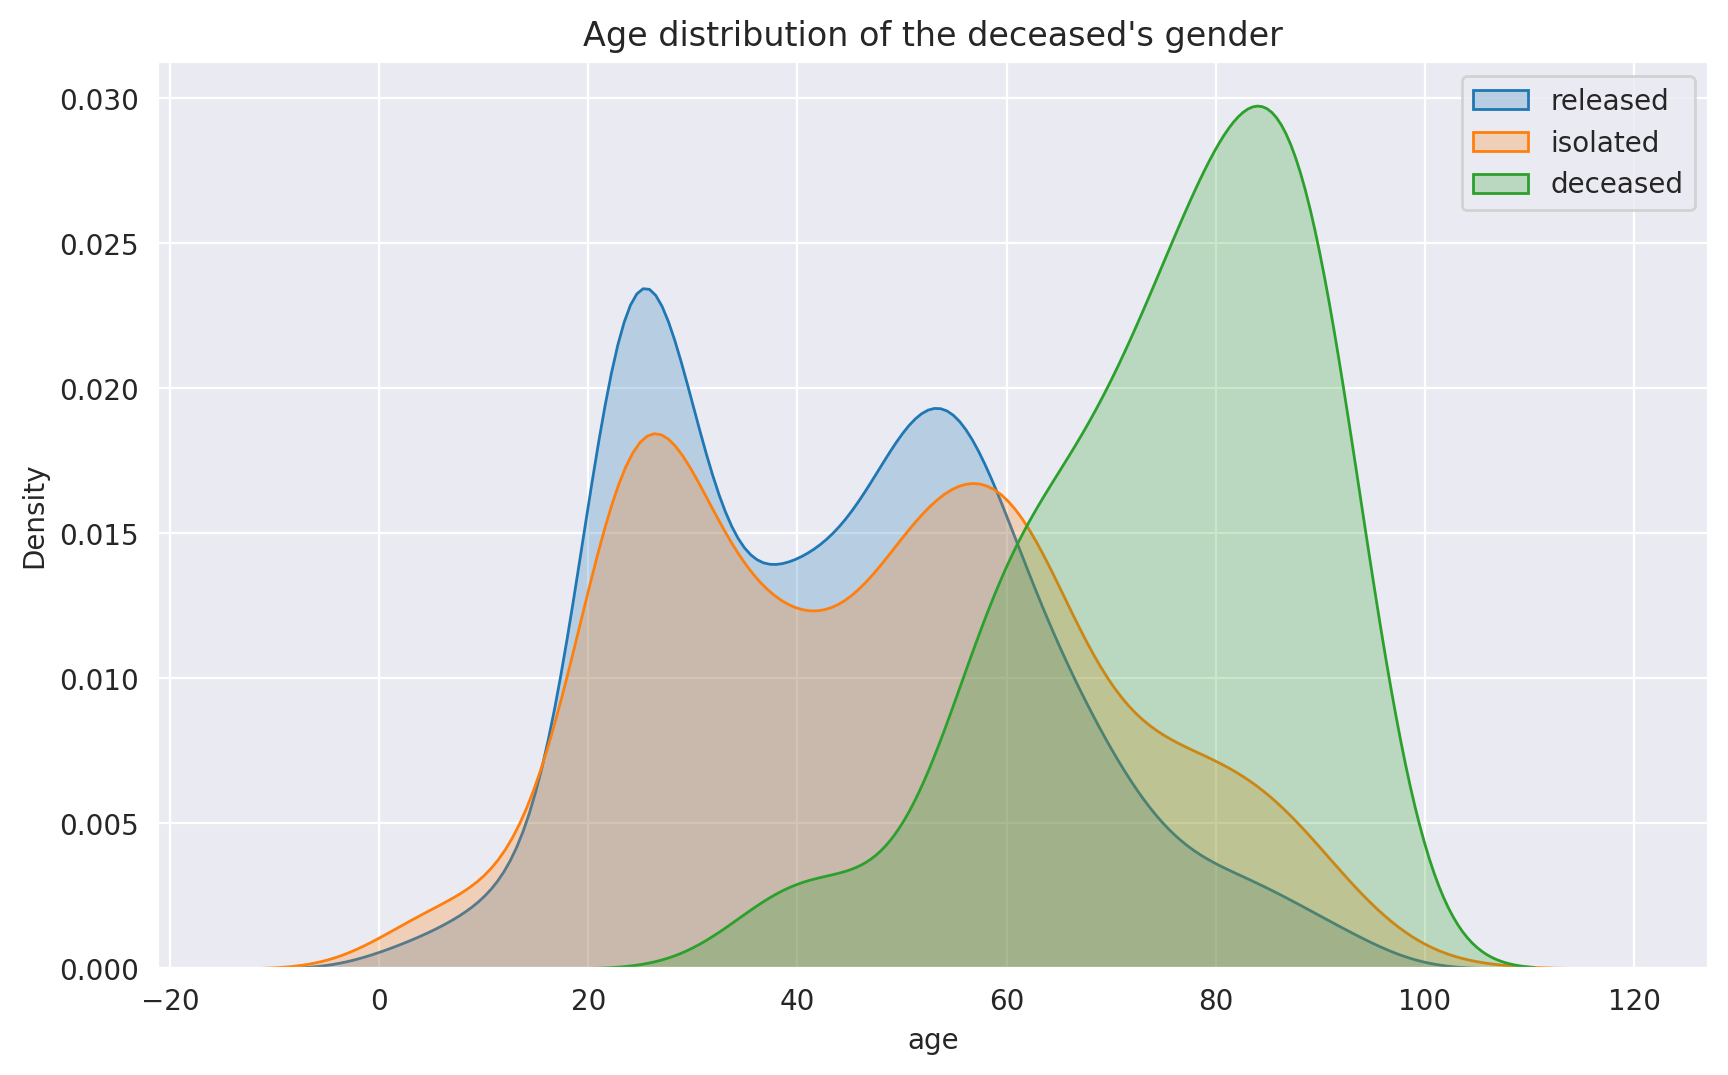

In [91]:
plt.figure(figsize=(10,6), dpi=200)
sns.set_style('darkgrid')
plt.title("Age distribution of the deceased's gender")

sns.kdeplot(data=released['age'],label='released',shade=True)
sns.kdeplot(data=isolated['age'],label='isolated',shade=True)
sns.kdeplot(data=deceased['age'],label='deceased',shade=True)

plt.legend()

Q. 환자 유형별 (격래해제자, 격리중, 사망) 비율 파이차트로 그리기

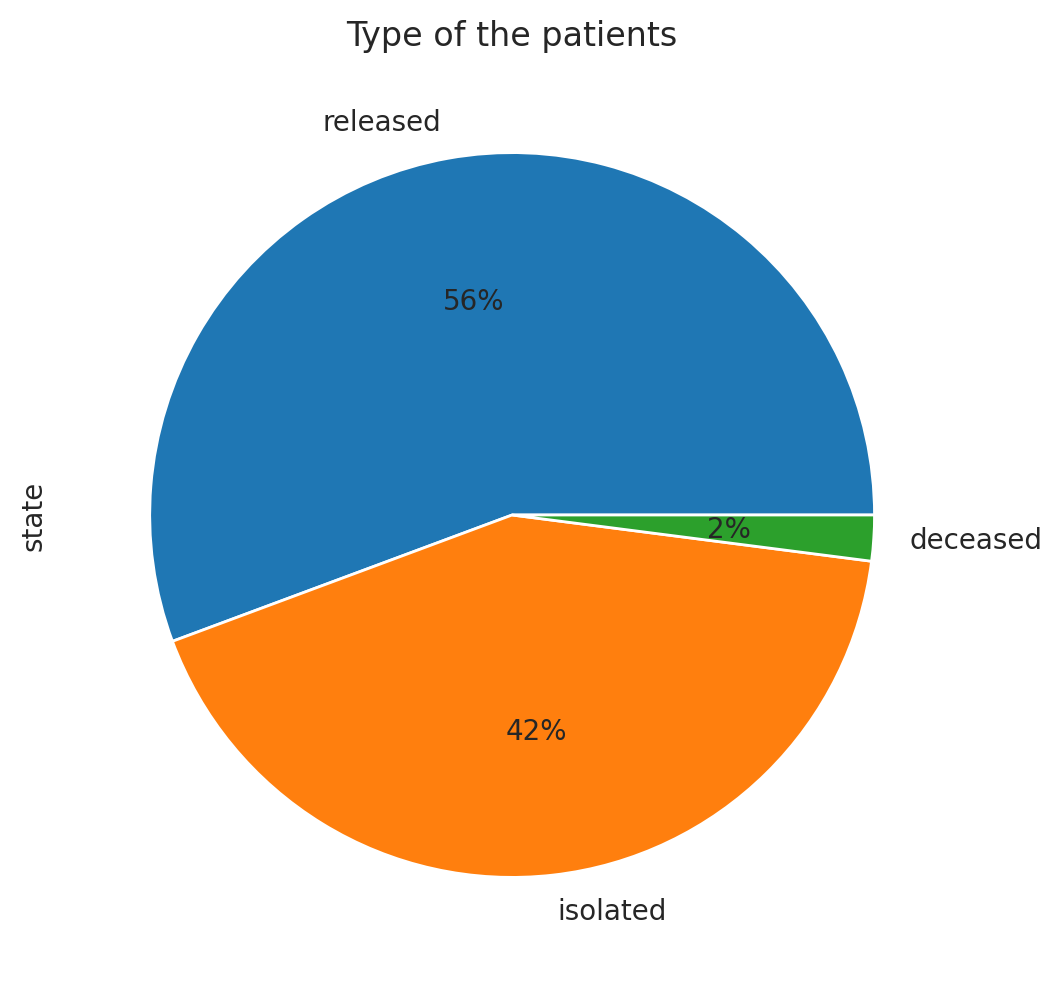

In [98]:
plt.figure(figsize=(10,6), dpi=200)
plt.title('Type of the patients')
patient.state.value_counts().plot.pie(autopct='%1.f%%')

날짜별 성별에 따른 사망자수 꺾은선 그래프 그리기

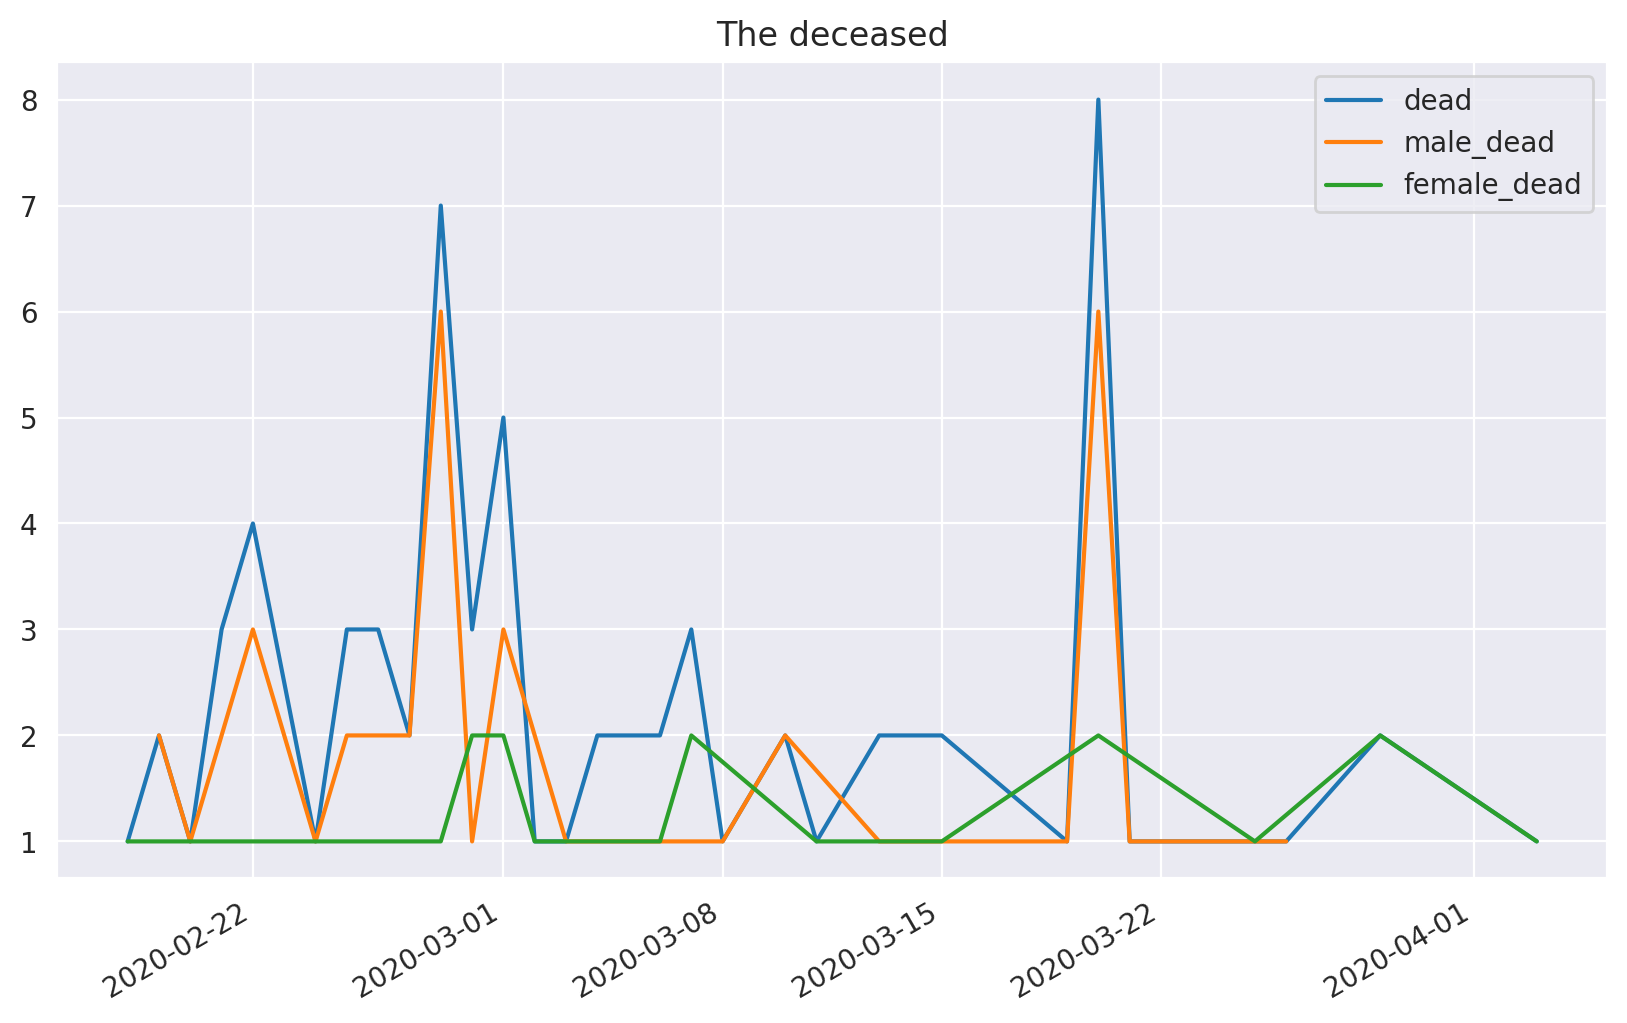

In [112]:
plt.figure(figsize=(10,6), dpi=200)
plt.title('The deceased')
pd.to_datetime(deceased.confirmed_date).value_counts().plot(label='dead')
pd.to_datetime(male_dead.confirmed_date).value_counts().plot(label='male_dead')
pd.to_datetime(female_dead.confirmed_date).value_counts().plot(label='female_dead')
plt.legend()

In [ ]:
patient